In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
class Bandit:
    def __init__(self, m):
        self.m = m
        # parameters for mu (prior is N(0,1))
        self.m0 = 0
        self.lambda0 = 1
        self.tau = 1
        # for convenience
        self.sum_x = 0
        self.N = 0
    
    def sample(self):
        # generates a sample from a distribution N(m0, lambda0)
        return self.m0 + (np.random.randn() / np.sqrt(self.lambda0))
        
    def pull(self):
        drawn_value = np.random.randn() + self.m
        self.sum_x += drawn_value
        # update
        self.lambda0 += self.tau
        self.m0 = (self.tau*self.sum_x) / self.lambda0
        # not necessaruy
        self.N += 1
        return drawn_value

1.0 / 0.7426735944661921 / 2
2.0 / 0.17371097329129975 / 1
3.0 / 3.0211421877641915 / 997


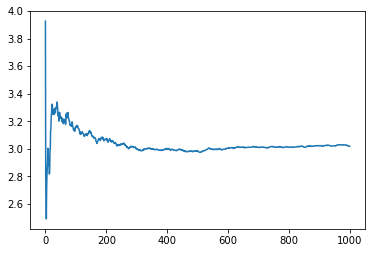

In [14]:
bandits = [Bandit(1.0), Bandit(2.0), Bandit(3.0)]
M = len(bandits)
N = 1000

data = np.empty(N)

for i in range(N):
    j = np.argmax([bandit.sample() for bandit in bandits])
    x = bandits[j].pull()
    data[i] = x

# plots
cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
plt.plot(cumulative_average)

# written outputs
print("\n".join(["{} / {} / {}".format(bandit.m, np.mean([bandit.sample() for i in range(1000)]), bandit.N) for bandit in bandits]))

In [7]:
np.log(10)

2.3025850929940459